# outlier handling

In [32]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
plt.rcParams['figure.figsize']=[8,6]
sns.set_style('darkgrid')
titanic=sns.load_dataset('titanic')

<AxesSubplot:ylabel='age'>

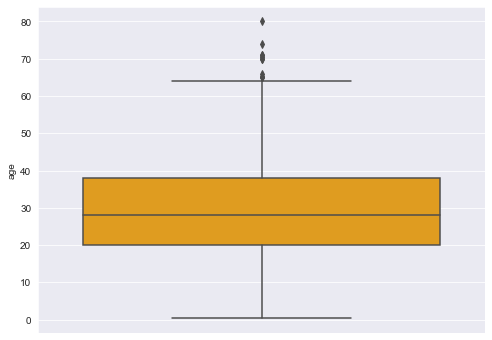

In [16]:
sns.boxplot(y=titanic['age'],data=titanic,color='orange')
#here is the outlier in our datasets we need to remove them for that first we need to find the limit
#upper and lower limit if a values cross the limit it will be consider the outlier in outr dataxets

In [22]:
IQR=titanic['age'].quantile(0.75)-titanic['age'].quantile(0.25)
lower_age_limit=titanic['age'].quantile(0.25)-(IQR*1.5)
upper_age_limit=titanic['age'].quantile(0.75)+(IQR*1.5)

In [25]:
#The output shows that any age value larger than 64.81 and smaller than –6.68 will be considered 
#an outlier. 
print(lower_age_limit)
print(upper_age_limit)

-6.6875
64.8125


In [26]:
#find the rows which contain the outlier
age_outlier=np.where(titanic['age']>upper_age_limit,True,np.where(titanic['age']<lower_age_limit,
                                                                 True,False))

In [27]:
# removes the rows containing the outlier values from the actual Titanic dataset.
age_without_outlier=titanic.loc[~(age_outlier),]

In [28]:
#The output shows the number of records before and after removing the outliers.
titanic.shape,age_without_outlier.shape

((891, 15), (880, 15))

<AxesSubplot:ylabel='age'>

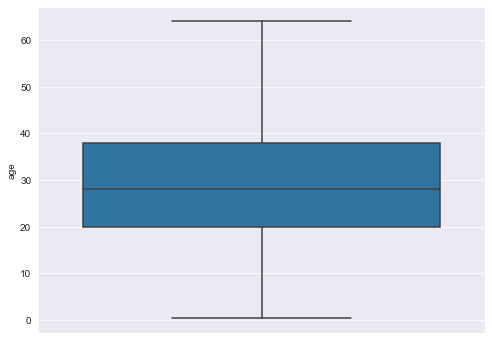

In [29]:
#finally draw the boxplot 
sns.boxplot(y='age',data=age_without_outlier)

# Outlier Capping Using Mean and Std

<AxesSubplot:ylabel='age'>

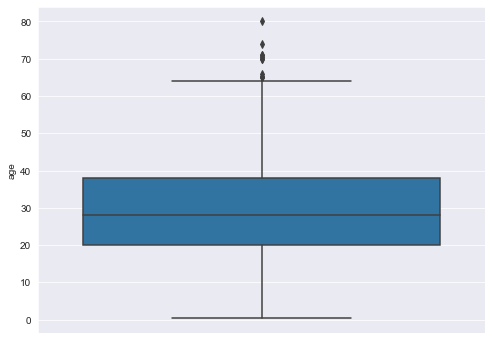

In [38]:
sns.boxplot(y='age',data=titanic)

In [44]:
#we are going to remove this outlier using mean and std  concept
#lower_limit=titanic['age'].mean()-(3*titanic['age'].std())
lower_age_limit=titanic['age'].mean()-(3*titanic['age'].std())
lower_age_limit

-13.88037434994331

In [46]:
upper_age_limit=titanic['age'].mean()+(3*titanic['age'].std())
upper_age_limit

73.27860964406095

In [48]:
#The following script replaces the outlier values with the upper and lower limits.
titanic['age']=np.where(titanic['age']>upper_age_limit,upper_age_limit,
    np.where(titanic['age']<lower_age_limit,lower_age_limit,titanic['age']))

<AxesSubplot:ylabel='age'>

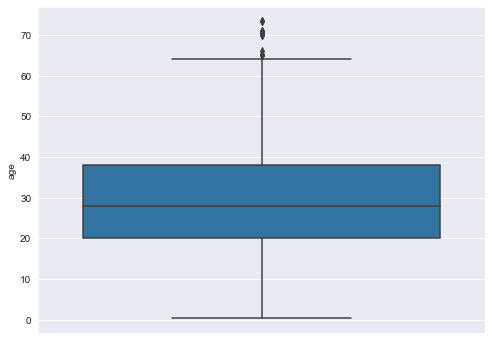

In [49]:
sns.boxplot(y='age',data=titanic)